In [66]:
!pip install geopandas

     |████████████████████████████████| 994 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 22.9 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 15.9 MB/s eta 0:00:01


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pycountry
import geopandas as gpd

# Top 10 Happiest Countries

In [4]:
whr = pd.read_csv('data/world-happiness-report-2021.csv')
whr.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [5]:
whr.tail(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
139,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43,0.000,0.062,0.155,0.298,0.172,0.212,2.876
140,Yemen,Middle East and North Africa,3.658,0.070,3.794,3.521,7.578,0.832,57.122,0.602,-0.147,0.800,2.43,0.329,0.831,0.272,0.268,0.092,0.089,1.776
141,Tanzania,Sub-Saharan Africa,3.623,0.071,3.762,3.485,7.876,0.702,57.999,0.833,0.183,0.577,2.43,0.433,0.540,0.300,0.549,0.307,0.231,1.263
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
143,Malawi,Sub-Saharan Africa,3.600,0.092,3.781,3.419,6.958,0.537,57.948,0.780,0.038,0.729,2.43,0.113,0.168,0.298,0.484,0.213,0.134,2.190
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


# Bottom 10 Least Happiest Countries

In [6]:
whr.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


[Data Dictionary](https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf)

* Ladder Score: Happiness score - national average response to the question of life evaluations with 0 representing the worst possible life, or the bottom of the ladder, and 10 representing the best possible life, or the top of the ladder
* GDP per capita - from the 10/2020 update of the World Development indicators
* Social Support - national average response to the question of having a ffiend or relative to count on in times of trouble with 0 being no and 1 being yes
* Healthy Life Expectancy - extracted from WHO
* Freedom to make life choices - national average response to  “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
* Generosity: national response averge to “Have you donated money to a charity in the past month?”

In [11]:
# Replace column names
whr.columns = whr.columns.str.replace(' ', '_')
whr.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


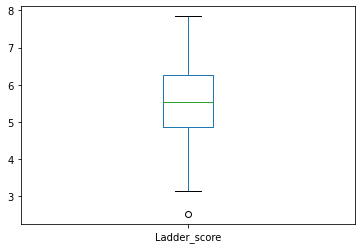

In [15]:
whr['Ladder_score'].plot(kind='box')
plt.show()

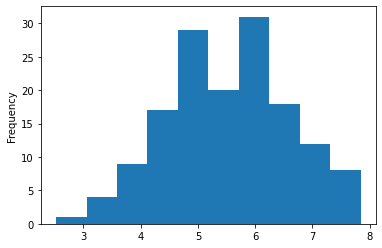

In [16]:
whr['Ladder_score'].plot(kind='hist')
plt.show()

In [17]:
whr['Regional_indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

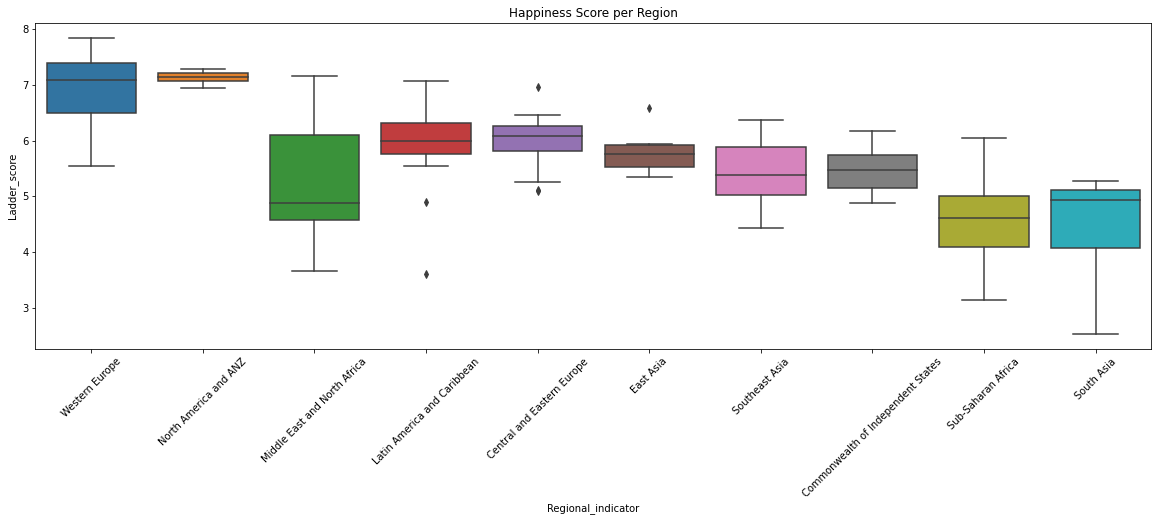

In [25]:
plt.figure(figsize=(20, 6))
sns.boxplot(x="Regional_indicator", y="Ladder_score", data=whr)
plt.title('Happiness Score per Region')
plt.xticks(rotation=45)
plt.show()

# Idea: Happiness Score per Continent

In [110]:
def get_alpha2(country):
    try:
        country = pycountry.countries.lookup(country) or pycountry.countries.get(name=country)
        return country.alpha_2
    except:
        return None

In [116]:
def get_alpha3(country):
    try:
        country = pycountry.countries.lookup(country) or pycountry.countries.get(name=country)
        return country.alpha_3
    except:
        return None

In [117]:
whr['Alpha_3'] = whr['Country_name'].apply(get_alpha3)

In [118]:
whr.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,...,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual,Alpha_2,Alpha_3
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,FIN,FIN
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,DNK,DNK
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,CHE,CHE
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,ISL,ISL
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,NLD,NLD


In [120]:
whr[whr['Alpha_3'].isna()]

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,...,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual,Alpha_2,Alpha_3
23,Taiwan Province of China,East Asia,6.584,0.038,6.659,6.510,10.871,0.898,69.600,0.784,...,2.43,1.480,0.982,0.665,0.490,0.142,0.139,2.687,None,None
32,Kosovo,Central and Eastern Europe,6.372,0.059,6.487,6.257,9.318,0.821,63.813,0.869,...,2.43,0.937,0.807,0.483,0.593,0.356,0.014,3.182,None,None
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.900,0.672,...,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262,None,None
73,North Cyprus,Western Europe,5.536,0.051,5.636,5.435,10.576,0.820,73.898,0.795,...,2.43,1.377,0.806,0.801,0.503,0.196,0.200,1.653,None,None
75,Russia,Commonwealth of Independent States,5.477,0.033,5.541,5.413,10.189,0.903,64.703,0.718,...,2.43,1.241,0.992,0.511,0.409,0.115,0.060,2.148,None,None
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,...,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236,None,None
82,Congo (Brazzaville),Sub-Saharan Africa,5.342,0.097,5.533,5.151,8.117,0.636,58.221,0.695,...,2.43,0.518,0.392,0.307,0.381,0.144,0.124,3.476,None,None
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,5.460,5.152,8.551,0.644,50.114,0.741,...,2.43,0.669,0.409,0.052,0.438,0.177,0.092,3.469,None,None
99,Laos,Southeast Asia,5.030,0.045,5.119,4.941,8.947,0.728,58.968,0.910,...,2.43,0.808,0.598,0.330,0.643,0.268,0.179,2.204,None,None
117,Iran,Middle East and North Africa,4.721,0.055,4.828,4.614,9.584,0.710,66.300,0.608,...,2.43,1.030,0.557,0.561,0.275,0.330,0.144,1.823,None,None


We're left with 12 countries without Alpha3 codes,

In [96]:
whr.isna().sum()

Country_name                                   0
Regional_indicator                             0
Ladder_score                                   0
Standard_error_of_ladder_score                 0
upperwhisker                                   0
lowerwhisker                                   0
Logged_GDP_per_capita                          0
Social_support                                 0
Healthy_life_expectancy                        0
Freedom_to_make_life_choices                   0
Generosity                                     0
Perceptions_of_corruption                      0
Ladder_score_in_Dystopia                       0
Explained_by:_Log_GDP_per_capita               0
Explained_by:_Social_support                   0
Explained_by:_Healthy_life_expectancy          0
Explained_by:_Freedom_to_make_life_choices     0
Explained_by:_Generosity                       0
Explained_by:_Perceptions_of_corruption        0
Dystopia_+_residual                            0
Alpha_2             

<AxesSubplot:xlabel='Logged_GDP_per_capita', ylabel='Ladder_score'>

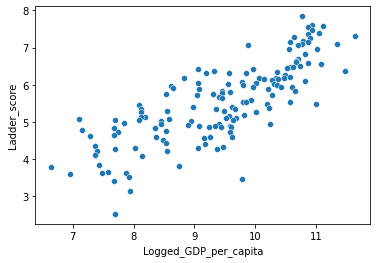

In [38]:
sns.scatterplot(x='Logged_GDP_per_capita', y="Ladder_score", data=whr)

<AxesSubplot:xlabel='Social_support', ylabel='Ladder_score'>

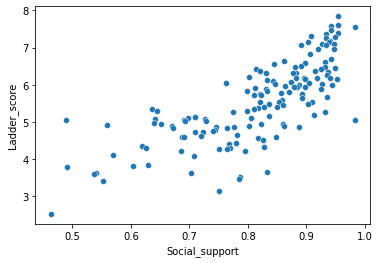

In [39]:
sns.scatterplot(x='Social_support', y="Ladder_score", data=whr)

<AxesSubplot:xlabel='Healthy_life_expectancy', ylabel='Ladder_score'>

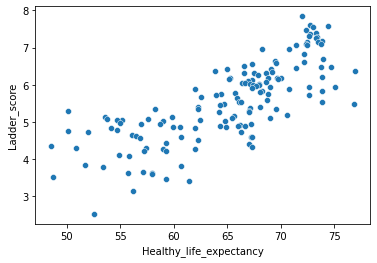

In [40]:
sns.scatterplot(x='Healthy_life_expectancy', y="Ladder_score", data=whr)

<AxesSubplot:xlabel='Freedom_to_make_life_choices', ylabel='Ladder_score'>

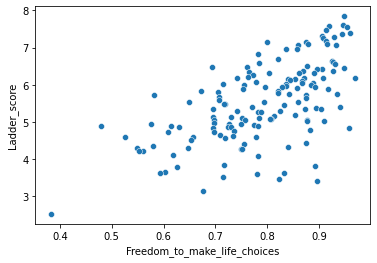

In [41]:
sns.scatterplot(x='Freedom_to_make_life_choices', y="Ladder_score", data=whr)

<AxesSubplot:xlabel='Generosity', ylabel='Ladder_score'>

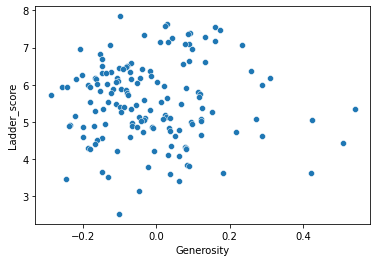

In [43]:
sns.scatterplot(x='Generosity', y="Ladder_score", data=whr)

<AxesSubplot:xlabel='Perceptions_of_corruption', ylabel='Ladder_score'>

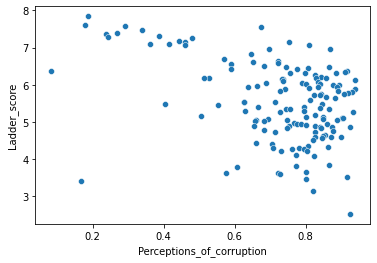

In [44]:
sns.scatterplot(x='Perceptions_of_corruption', y="Ladder_score", data=whr)

In [49]:
whr_corr = whr.loc[:, ['Ladder_score', 'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption'] ]

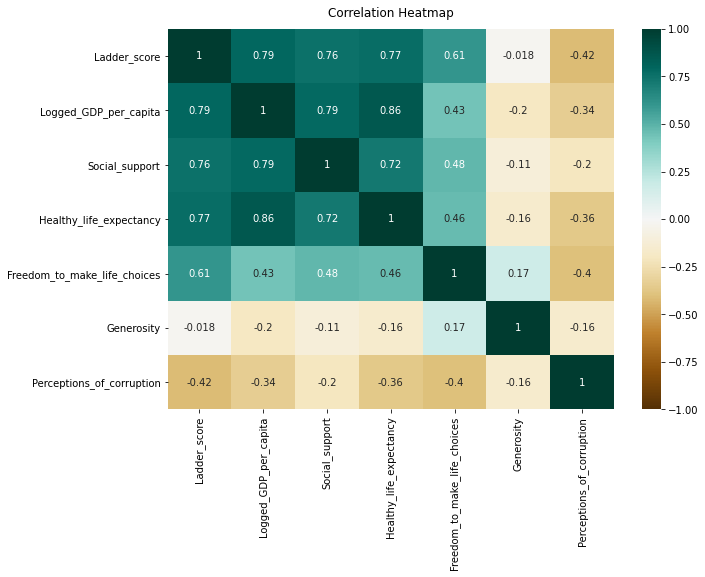

In [56]:
plt.figure(figsize=(10, 7))
corr_heatmap = sns.heatmap(whr_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

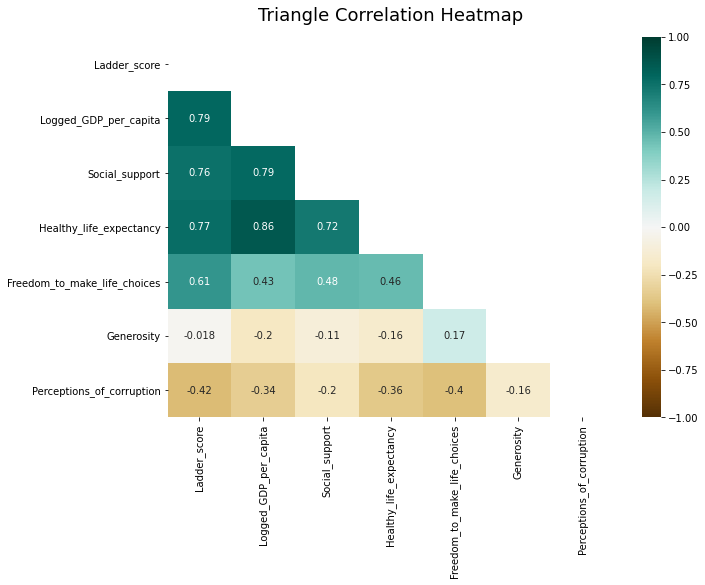

In [58]:
plt.figure(figsize=(10, 7))
mask = np.triu(np.ones_like(whr_corr.corr(), dtype=bool))
corr_heatmap = sns.heatmap(whr_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
corr_heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<Figure size 1440x576 with 0 Axes>

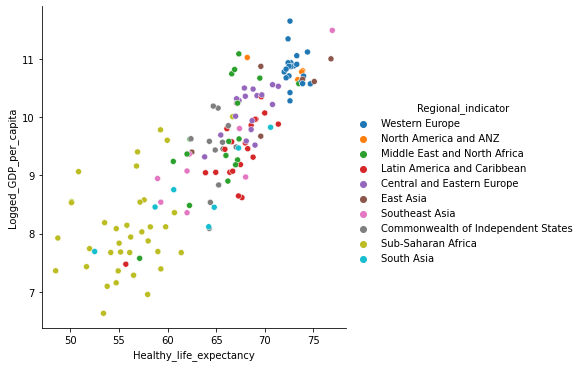

In [186]:
plt.figure(figsize=(20, 8));
relplot = sns.relplot(x='Healthy_life_expectancy', y='Logged_GDP_per_capita', hue='Regional_indicator', data=whr);

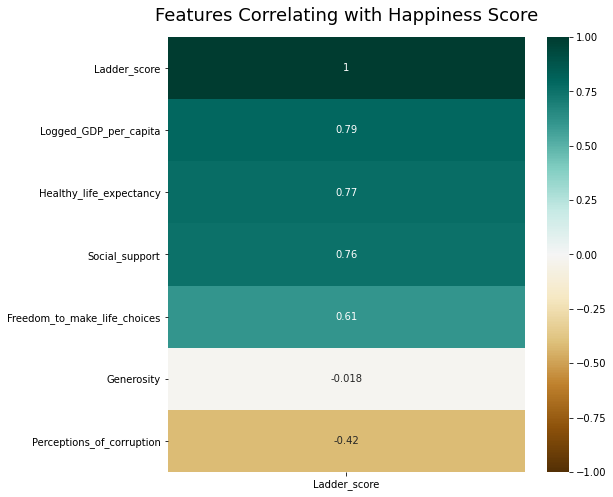

In [65]:
plt.figure(figsize=(8, 8))
happy_heatmap = sns.heatmap(whr_corr.corr()[['Ladder_score']].sort_values(by='Ladder_score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
happy_heatmap.set_title('Features Correlating with Happiness Score', fontdict={'fontsize':18}, pad=16);

Factors most correlated with happiness score:
* Logged_GDP_per_capita
* Social_support
* Healthy_life_expectancy

Factors least correlated with happiness score:
* Generosity
* Perceptions_of_corruption

Other notable correlations:
* Healthy life expectancy is highly correlated with Logged_GDP_per_capita and Social_support
* Logged_GDP_per_capita is also highly correlated with Social_support

In [69]:
# Setting the path to the shapefile
SHAPEFILE = 'data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)

,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [81]:
geo_df[geo_df['country'] == 'United States of America']

,country,country_code,geometry
153,United States of America,USA,"MULTIPOLYGON (((-95.16057 49.36949, -95.10282 ..."


<AxesSubplot:>

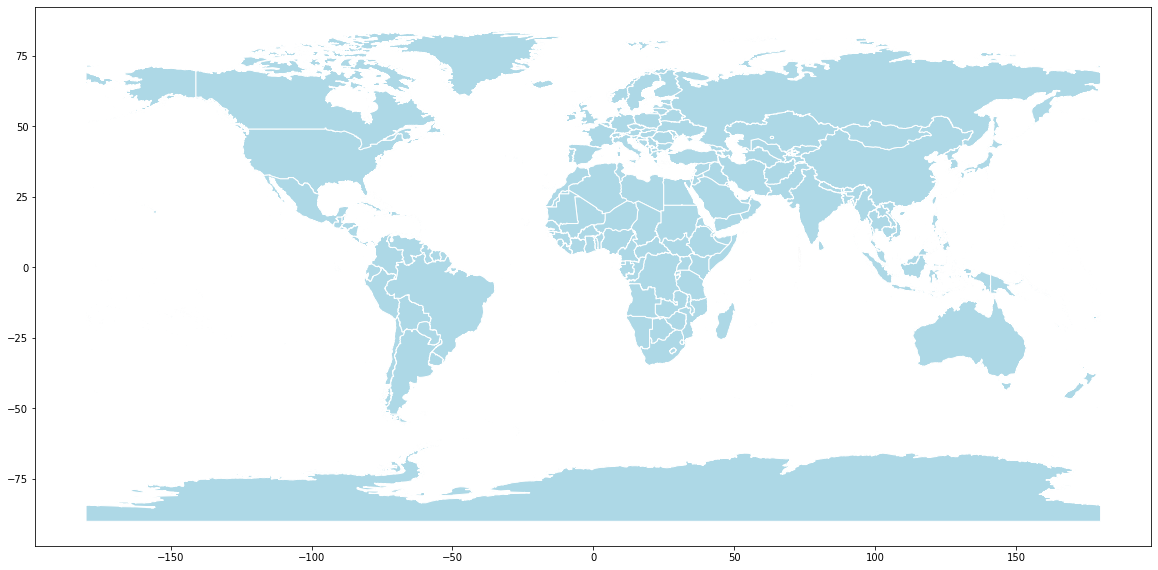

In [70]:
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

In [140]:
whr

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,...,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual,Alpha_2,Alpha_3
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,FIN,FIN
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,DNK,DNK
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,CHE,CHE
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,ISL,ISL
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,NLD,NLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800,LSO,LSO
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,BWA,BWA
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,RWA,RWA
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,ZWE,ZWE


In [164]:
geo_df.sort_values(by='country_code').tail()

,country,country_code,geometry
232,Samoa,WSM,"MULTIPOLYGON (((-172.20104 -13.59254, -172.197..."
161,Yemen,YEM,"MULTIPOLYGON (((51.97861 18.99564, 51.98569 18..."
37,South Africa,ZAF,"MULTIPOLYGON (((19.98145 -24.75249, 19.98641 -..."
81,Zambia,ZMB,"POLYGON ((32.92086 -9.40790, 32.92303 -9.46629..."
108,Zimbabwe,ZWE,"POLYGON ((25.25978 -17.79411, 25.26671 -17.800..."


In [171]:
df[df['Country_name'].isna()].sort_values(by='country').tail(40)

,country,country_code,geometry,Country_name,Alpha_3,Ladder_score
206,Saint Barthelemy,BLM,"POLYGON ((-62.83886 17.88198, -62.85094 17.890...",NaN,NaN,NaN
214,Saint Helena,SHN,"MULTIPOLYGON (((-9.92638 -40.34881, -9.90636 -...",NaN,NaN,NaN
204,Saint Kitts and Nevis,KNA,"MULTIPOLYGON (((-62.59923 17.20295, -62.57844 ...",NaN,NaN,NaN
199,Saint Lucia,LCA,"POLYGON ((-60.88679 14.01008, -60.88296 13.980...",NaN,NaN,NaN
38,Saint Martin,MAF,"POLYGON ((-63.01757 18.03339, -63.08589 18.058...",NaN,NaN,NaN
187,Saint Pierre and Miquelon,SPM,"MULTIPOLYGON (((-56.15095 46.79365, -56.15648 ...",NaN,NaN,NaN
197,Saint Vincent and the Grenadines,VCT,"MULTIPOLYGON (((-61.19400 13.03685, -61.20832 ...",NaN,NaN,NaN
232,Samoa,WSM,"MULTIPOLYGON (((-172.20104 -13.59254, -172.197...",NaN,NaN,NaN
111,San Marino,SMR,"POLYGON ((12.42945 43.89206, 12.39958 43.90322...",NaN,NaN,NaN
254,Scarborough Reef,SCR,"POLYGON ((117.75389 15.15437, 117.75569 15.151...",NaN,NaN,NaN


In [172]:
whr_simple.sort_values(by='Country_name').tail(40)

,Country_name,Alpha_3,Ladder_score
60,Philippines,PHL,5.880
43,Poland,POL,6.166
57,Portugal,PRT,5.929
45,Romania,ROU,6.140
75,Russia,None,5.477
146,Rwanda,RWA,3.415
25,Saudi Arabia,SAU,6.494
91,Senegal,SEN,5.132
47,Serbia,SRB,6.078
137,Sierra Leone,SLE,3.849


In [174]:
whr_simple = whr.loc[:, ['Country_name', 'Alpha_3', 'Ladder_score']]
df = pd.merge(left=geo_df, right=whr_simple, how='left', left_on='country_code', right_on='Alpha_3')

In [175]:
whr_simple['Alpha_3'].unique

<bound method Series.unique of 0      FIN
1      DNK
2      CHE
3      ISL
4      NLD
      ... 
144    LSO
145    BWA
146    RWA
147    ZWE
148    AFG
Name: Alpha_3, Length: 149, dtype: object>

In [176]:
df['country_code'].unique

<bound method Series.unique of 0      IDN
1      MYS
2      CHL
3      BOL
4      PER
      ... 
250    MAC
251    ATC
252    BJN
253    SER
254    SCR
Name: country_code, Length: 255, dtype: object>

In [177]:
df.isna().sum()

country           0
country_code      0
geometry          0
Country_name    118
Alpha_3         118
Ladder_score    118
dtype: int64

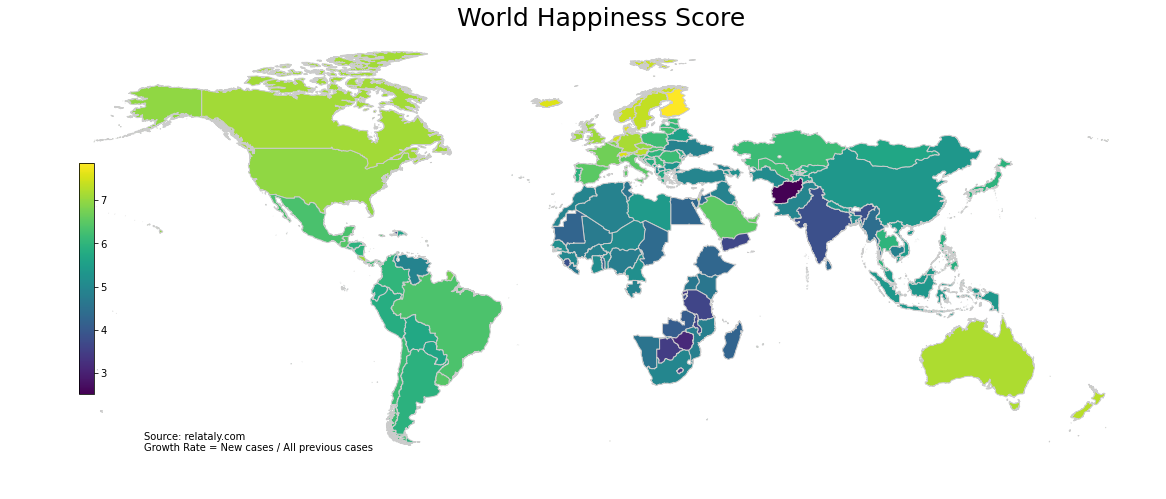

In [178]:
title = 'World Happiness Score'
col = 'Ladder_score'
#source = 'Source: relataly.com \nGrowth Rate = New cases / All previous cases'
vmin = df[col].min()
vmax = df[col].max()
cmap = 'viridis'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

plt.show()

Resources
* https://www.relataly.com/visualize-covid-19-data-on-a-geographic-heat-maps/291/
* https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e